In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from collections import OrderedDict

In [87]:

#P-arrival data from 3 different steel lenghts
arrivals = pd.read_csv('/Users/**/calibration_arrivals.csv')
arrivals_columns = arrivals.columns
zero_times_2019 = pd.read_csv('/Users/**/2019_vp_zt_calibration.csv')
zero_times_2019_columns = zero_times_2019.columns

#steel thicknesses in mm
thickness = np.array([6.34,12.69,19.06])
previous_cal_zerotime = zero_times_2019['Zerotime (mu-s)']
previous_cal_stress = zero_times_2019['stress (MPa)']

#Arrival times for at each stress for three steel thicknesses (2020)
arrivals

,stress(MPa),6.34mm,12.69mm,19.06mm
0,5,287,341,396
1,10,285,340,394
2,20,283,341,392
3,30,282,338,391
4,40,281,337,390
5,50,280,336,389
6,60,280,335,388
7,70,279,334,386


In [88]:
#zerotimes for acoustic calibration completed in 2019

zero_times_2019

,stress (MPa),Zerotime (mu-s)
0,5.0,4.736056
1,10.0,4.676056
2,20.0,4.656056
3,30.0,4.655775
4,50.0,4.615775
5,70.0,4.655493
6,90.0,4.635493


In [89]:
#Least squares minimization gives values in b,m format from y = mx+b
def lst_sqrs(x_vector,y_vector):
    A = np.array([np.ones([x_vector.size,]),x_vector])
    Y = y_vector
    A = A.T
    x = np.linalg.inv(np.dot(A.T,A))
    y = np.dot(A.T,Y)
    x_ls = np.dot(x,y)
    return x_ls,A

def rec2time(record):
    time = (record)*0.02
    #time = (record-513)*0.02
    return time

def calc_slope(x_pred,m,b):
    y_pred = b + m*x_pred
    return y_pred

def slope2velocity(m):
    velocity = (1./(m*0.02))
    return velocity

In [92]:
zero_time = []
slope = []
time = []
stress = arrivals['stress(MPa)'].values
x_pred = np.arange(0, np.max(thickness)+1,1)

for i in range(stress.size):
    x= lst_sqrs(thickness[:],arrivals.iloc[i,1:])[0]
    zero_time.append(x[0])
    slope.append(x[1])

for i in range(0,stress.size):
    tm = rec2time(zero_time[i])
    time.append(tm)

time = np.array(time)
slope = np.array(slope)

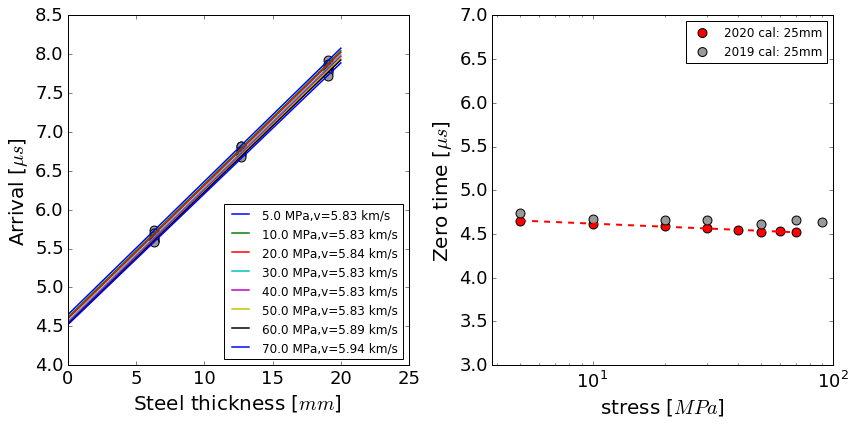

In [98]:
#Fit zerotime data to create function which computes zerotimes from any stress value< 100MPa.
m,b = np.polyfit(np.log10(arrivals['stress(MPa)']),time,1)

#plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
for i in range(0,stress.size):
    ax.scatter(thickness[:],rec2time(arrivals.iloc[i,1:]),s=80,label='_nolegend_',edgecolor='k', color='0.6')
    ax.plot(x_pred,rec2time(calc_slope(x_pred,slope[i],zero_time[i])),linewidth =1.5, label='%.1f MPa,v=%.2f km/s'%(stress[i],slope2velocity(slope[i])))
ax.set_ylabel('Arrival [$\mu s$]',fontsize = 20)
ax.set_xlabel('Steel thickness [$mm$] ',fontsize = 20)
#ax.set_ylim([0,10])
ax.set_xlim([0,25])
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(scatterpoints=1,loc='best')

ax = fig.add_subplot(1,2,2)
ax.scatter(arrivals['stress(MPa)'],time,s=80,label='2020 cal: 25mm',edgecolor='k', color='r')
ax.scatter(previous_cal_stress.values,previous_cal_zerotime.values,label = '2019 cal: 25mm',edgecolors='k',s=80,color='0.6')
ax.plot(arrivals['stress(MPa)'].values,m*np.log10(arrivals['stress(MPa)'].values)+b,'--',linewidth=2,c='r')
ax.set_ylabel('Zero time [$\mu s$]',fontsize = 20)
ax.set_xlabel('stress [$MPa$] ',fontsize = 20)
ax.set_xscale('log')
ax.set_ylim([3,7])
ax.set_xlim([0,100])
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(scatterpoints=1,loc='best')
plt.tight_layout()

#plt.savefig('fits.pdf')

